#Leitura DataFrame

Com base no Challenge Telecom X, iremos utilizar o banco de dados dados_tratados.csv para começar o tratamento das variáveis para torná-las compatíveis com algoritmos de machine learning. Utilizaremos um método one-hot encoding de codificação.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/dados_tratados.csv')
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_numeric,FaixaMensal
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0,61-90
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0,31-60
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,61-90
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1,91-120
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1,61-90


In [ ]:
#Retirada 2 colunas que foram criadas no exercicio anterior.
dados = dados.drop(columns=['Churn_numeric', 'FaixaMensal'])

Foi verificado alguns NaNs nas variaveis explicativas:
- remainder__Charges.Total com 11 NaNs

Hipotese: Já que remainder__Charges.Monthly constavam valores, acredita-se serem possiveis clientes novos e por conta disso não tinham valores totais ainda.

In [ ]:
print(dados.isna().sum()[dados.isna().sum() > 0])

Charges.Total    11
dtype: int64


In [ ]:
# Provando a hipotese NaNs serem de clientes novos
# Filtrar linhas onde 'Charges.Total' é NaN e verificar 'Charges.Monthly'
clientes_novos = dados[dados['Charges.Total'].isna()]
print(clientes_novos[['Charges.Monthly', 'tenure']].describe())
#Como 'tenure' foi ZERO para todos os 11 casos de NaN a hipotese esta correta

       Charges.Monthly  tenure
count        11.000000    11.0
mean         41.418182     0.0
std          23.831484     0.0
min          19.700000     0.0
25%          20.125000     0.0
50%          25.750000     0.0
75%          58.975000     0.0
max          80.850000     0.0


In [ ]:
dados['Charges.Total'] = dados['Charges.Total'].fillna(0)

In [ ]:
print(dados.isna().sum()[dados.isna().sum() > 0])

Series([], dtype: int64)


#Separação das variáveis alvo e explicativas

In [ ]:
x = dados.drop(columns='Churn')
y = dados['Churn']

#Transformando as variáveis explicativas

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in dados.columns:
    print(f"{col}: {dados[col].nunique()}")

Churn: 2
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Charges.Monthly: 1585
Charges.Total: 6531


In [ ]:
colunas = x.columns
x.columns = x.columns.str.strip()

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop= 'if_binary'),
    ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService',
     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
     'Contract', 'PaperlessBilling', 'PaymentMethod']),
    remainder= 'passthrough',
    sparse_threshold=0)


In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

In [ ]:
x

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70
7040,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75
7041,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65


#Transformando Variavel Alvo

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

#Verificação da Proporção de Evasão

In [ ]:
dados.value_counts("Churn", normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


#Matriz de correlação

In [ ]:
variaveis_num = [
    'tenure',
    'Charges.Monthly',
    'Charges.Total'
]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados['Churn'] = dados['Churn'].map({'Yes': 1, 'No': 0})

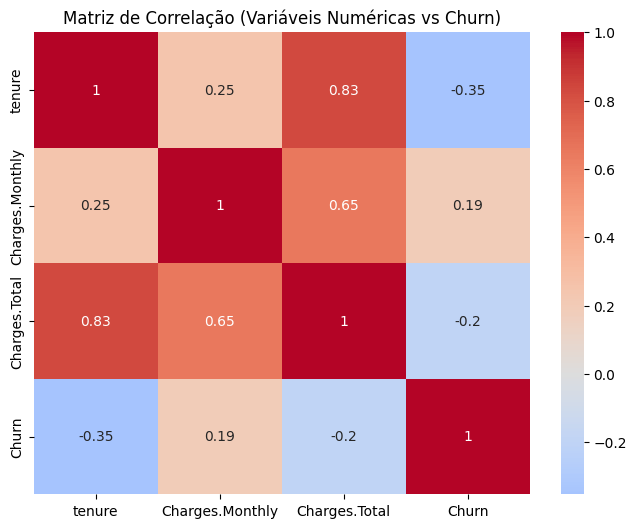

In [ ]:
corr = dados[variaveis_num + ['Churn']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação (Variáveis Numéricas vs Churn)")
plt.show()

- tenure é a variável mais relevante:
A correlação negativa (-0.35) indica que clientes mais antigos são mais fiéis.

- Charges.Monthly (0.20) está associada a mais evasão:
A cobrança mensal alta pode estar ligada a insatisfação.

- Charges.Total (-0.19) não é um bom preditor direto:
A correlação é fraca  e pode ser influenciada por tenure



#Análises Direcionadas

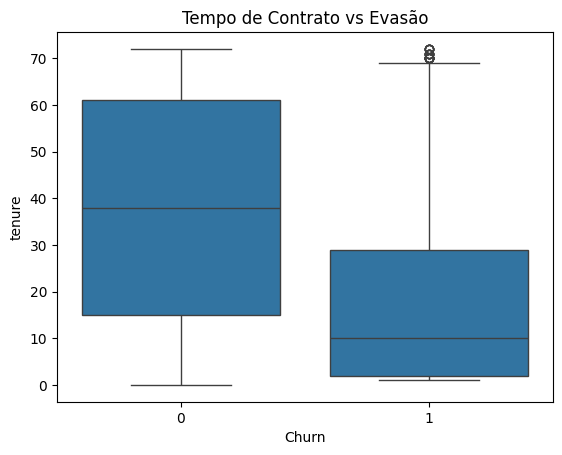

In [ ]:
#Boxplot de tenure vs Churn:
sns.boxplot(x='Churn', y='tenure', data=dados)
plt.title("Tempo de Contrato vs Evasão")
plt.show()

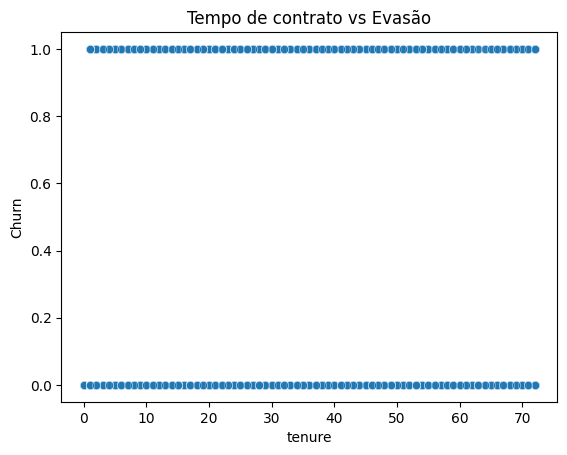

In [ ]:
#Scatter plot de tenure vs Churn:
sns.scatterplot(x='tenure', y='Churn', data=dados, alpha=0.5)
plt.title("Tempo de contrato vs Evasão")
plt.show()

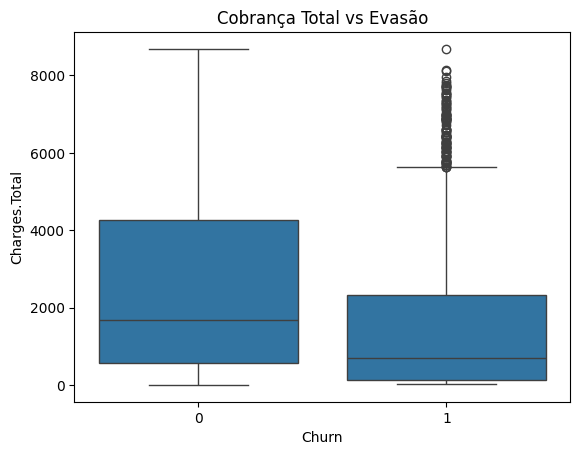

In [ ]:
#Boxplot de Charges.Total vs Churn:
sns.boxplot(x='Churn', y='Charges.Total', data=dados)
plt.title("Cobrança Total vs Evasão")
plt.show()

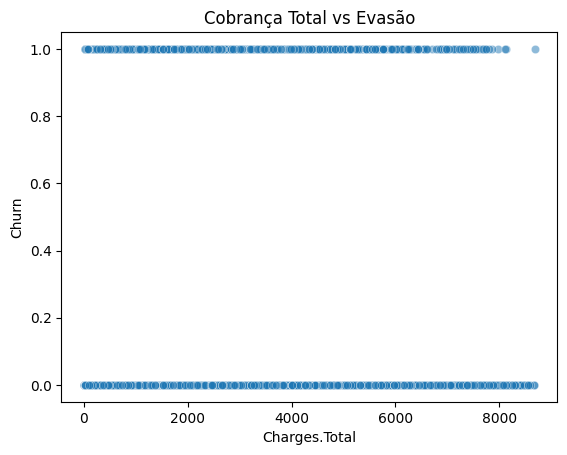

In [ ]:
#Scatter plot de Charges.Total vs Churn:
sns.scatterplot(x='Charges.Total', y='Churn', data=dados, alpha=0.5)
plt.title("Cobrança Total vs Evasão")
plt.show()

#Separação de Dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3 , stratify=y, random_state=42)

#DummyClassifier (baseline)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
y_prev_dummy = dummy.predict(x_teste)

print("Relatório DummyClassifier:\n", classification_report(y_teste, y_prev_dummy, zero_division=0))

Relatório DummyClassifier:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



#Metodos Decision Tree e Random Forest

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, recall_score

In [ ]:
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_prev_arvore = modelo_arvore.predict(x_teste)

In [ ]:
print("Decision Tree - Relatório de Classificação:\n", classification_report(y_teste, y_prev_arvore))

Decision Tree - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1552
           1       0.50      0.52      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.73      0.73      2113



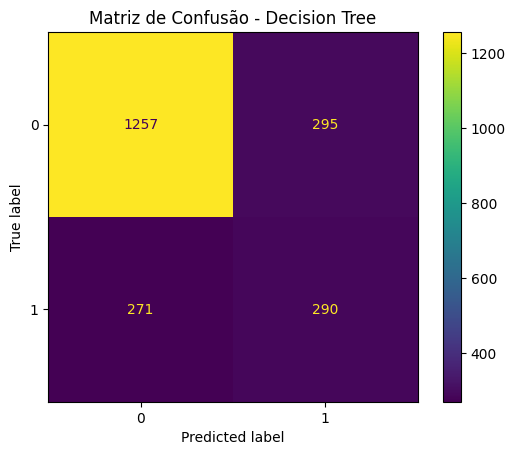

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix_conf_arvore = confusion_matrix(y_true= y_teste,y_pred= y_prev_arvore)
disp = ConfusionMatrixDisplay(matrix_conf_arvore)
disp.plot()
plt.title("Matriz de Confusão - Decision Tree")
plt.show()

#Analisando a importância das variáveis DecisionTree

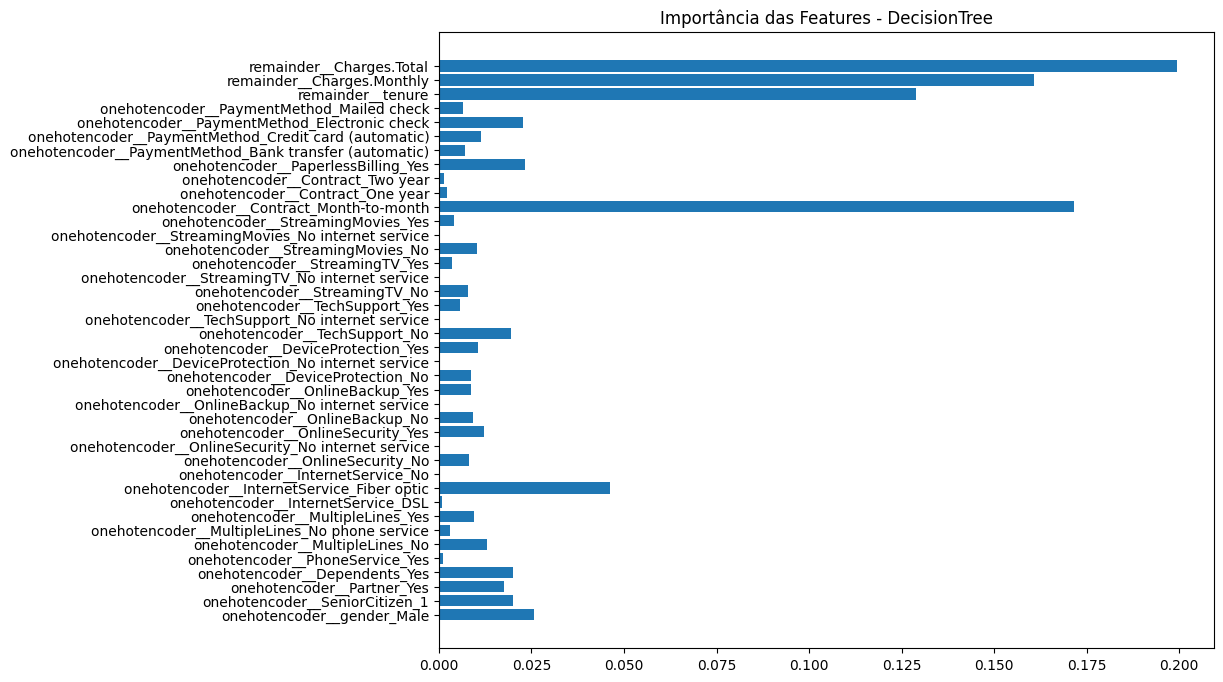

In [ ]:
import matplotlib.pyplot as plt

# Plotar importância das features
plt.figure(figsize=(10, 8))
plt.barh(x.columns, modelo_arvore.feature_importances_)
plt.title("Importância das Features - DecisionTree")
plt.show()

#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_forest = RandomForestClassifier(random_state=42)
modelo_forest.fit(x_treino, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
y_prev_forest = modelo_forest.predict(x_teste)

In [ ]:
print("Random Forest - Relatório de Classificação:\n", classification_report(y_teste, y_prev_forest))

Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



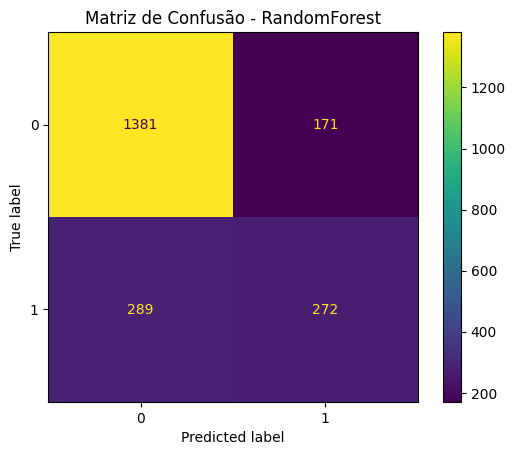

In [ ]:
matrix_conf_forest = confusion_matrix(y_true= y_teste, y_pred= y_prev_forest)
disp = ConfusionMatrixDisplay(matrix_conf_forest)
disp.plot()
plt.title("Matriz de Confusão - RandomForest")
plt.show()

#Analisando a importância das variáveis RandomForest

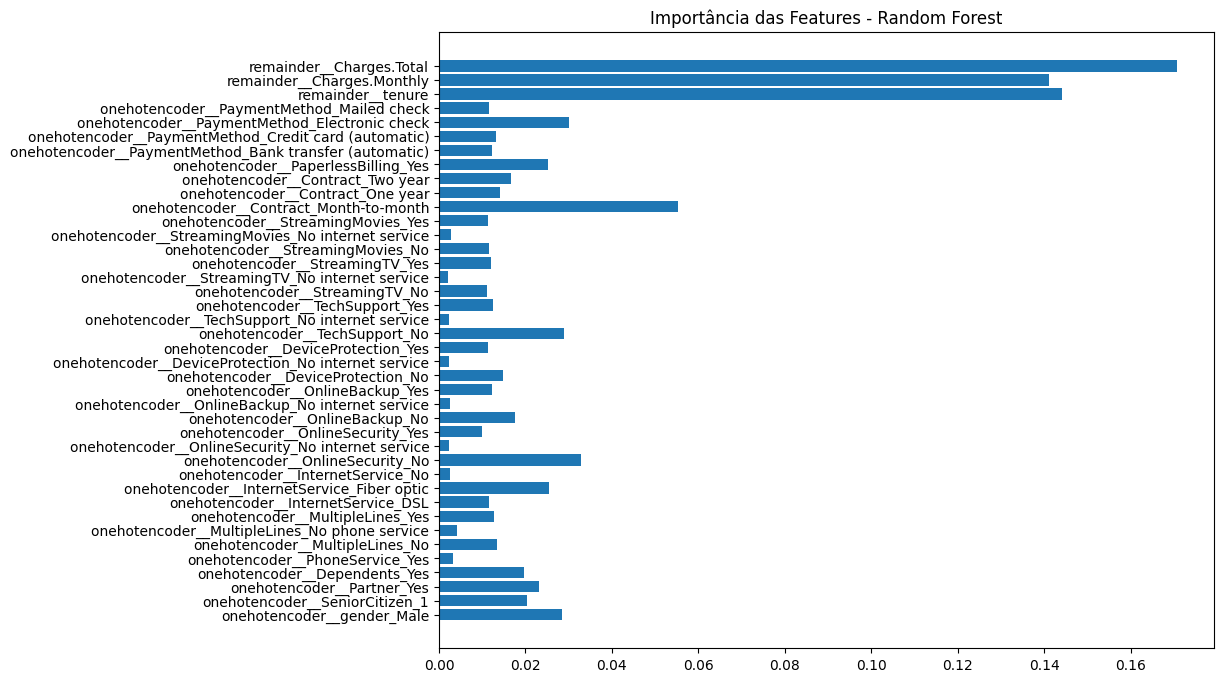

In [ ]:
import matplotlib.pyplot as plt

# Plotar importância das features
plt.figure(figsize=(10, 8))
plt.barh(x.columns, modelo_forest.feature_importances_)
plt.title("Importância das Features - Random Forest")
plt.show()

Verificado que apenas 3 variáveis numéricas (tenure, Charges.Monthly, e Charges.Total) têm importância significativa (> 0.10) tanto Random Forest quanto no DecisionTree, enquanto as demais (especialmente as one-hot encoded) têm importância próxima de zero (< 0.04), isso indica que:
- Variáveis categóricas não estão contribuindo para o modelo, mesmo após one-hot encoding
- O modelo está dependendo quase exclusivamente das variáveis numéricas, o que limita seu poder preditivo.

#Retirando as variaveis com importancia significativa abaixo de 0.05

In [ ]:
important_features = x.columns[modelo_forest.feature_importances_ > 0.05]
x_treino_reduzido = x_treino[important_features]
x_teste_reduzido = x_teste[important_features]

In [ ]:
print("Features selecionadas:", important_features)

Features selecionadas: Index(['onehotencoder__Contract_Month-to-month', 'remainder__tenure',
       'remainder__Charges.Monthly', 'remainder__Charges.Total'],
      dtype='object')


#Retreinando os modelos após retirada das variaveis

DecisionTree

In [ ]:
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(x_treino_reduzido, y_treino)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_prev_arvore = modelo_arvore.predict(x_teste_reduzido)

In [ ]:
print("Decision Tree - Relatório de Classificação:\n", classification_report(y_teste, y_prev_arvore))

Decision Tree - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.47      0.47      0.47       561

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



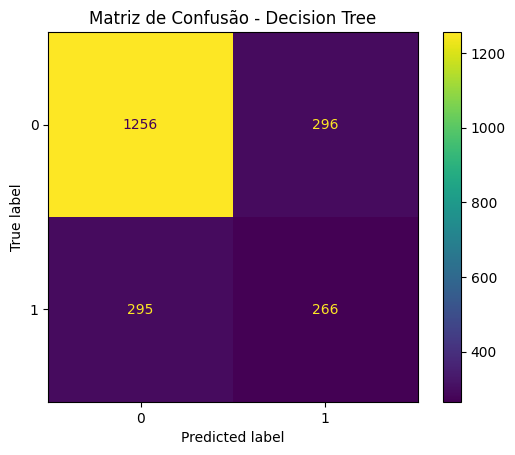

In [ ]:
matrix_conf_arvore = confusion_matrix(y_true= y_teste,y_pred= y_prev_arvore)
disp = ConfusionMatrixDisplay(matrix_conf_arvore)
disp.plot()
plt.title("Matriz de Confusão - Decision Tree")
plt.show()

RandomForest

In [ ]:
modelo_forest = RandomForestClassifier(random_state=42)
modelo_forest.fit(x_treino_reduzido, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
y_prev_forest = modelo_forest.predict(x_teste_reduzido)

In [ ]:
print("Random Forest - Relatório de Classificação:\n", classification_report(y_teste, y_prev_forest))

Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1552
           1       0.55      0.48      0.51       561

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



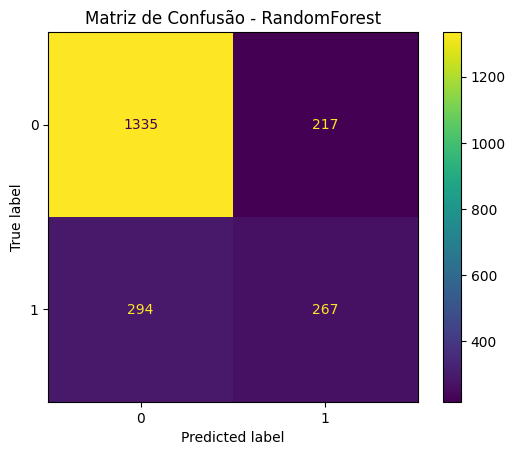

In [ ]:
matrix_conf_forest = confusion_matrix(y_true= y_teste, y_pred= y_prev_forest)
disp = ConfusionMatrixDisplay(matrix_conf_forest)
disp.plot()
plt.title("Matriz de Confusão - RandomForest")
plt.show()

#Após a retirada das features (variáveis com importância significativa abaixo de 0.05), não houve diferenças significativas, confirmando que elas realmente tinham pouca relevância para o modelo. Agora, vamos alterar o max_depth para verificar como isso afeta os modelos.

In [ ]:
#DECISION TREE com max_depth=5, class_weight='balanced' geraram melhores resultados

modelo_arvore = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
modelo_arvore.fit(x_treino_reduzido, y_treino)
y_prev_arvore = modelo_arvore.predict(x_teste_reduzido)
print("Decision Tree - Relatório de Classificação:\n", classification_report(y_teste, y_prev_arvore))

Decision Tree - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1552
           1       0.48      0.82      0.61       561

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.72      0.73      2113



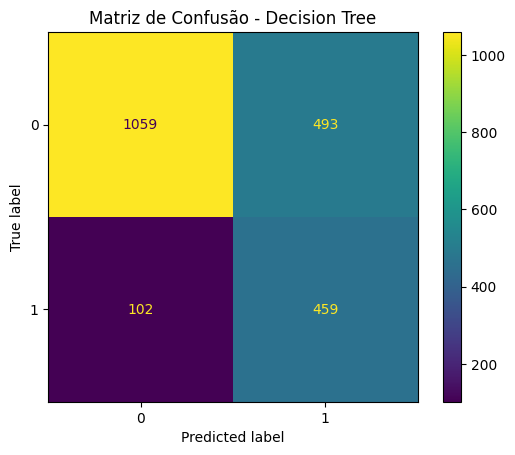

In [ ]:
matrix_conf_arvore = confusion_matrix(y_true= y_teste,y_pred= y_prev_arvore)
disp = ConfusionMatrixDisplay(matrix_conf_arvore)
disp.plot()
plt.title("Matriz de Confusão - Decision Tree")
plt.show()

In [ ]:
#RANDOM FOREST  com class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 100 geraram melhores resultados

modelo_forest = RandomForestClassifier(max_depth=3, n_estimators=100, class_weight='balanced', random_state=42)
modelo_forest.fit(x_treino_reduzido, y_treino)
y_prev_forest = modelo_forest.predict(x_teste_reduzido)
print("Random Forest - Relatório de Classificação:\n", classification_report(y_teste, y_prev_forest))

Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1552
           1       0.46      0.82      0.59       561

    accuracy                           0.70      2113
   macro avg       0.69      0.74      0.68      2113
weighted avg       0.79      0.70      0.72      2113



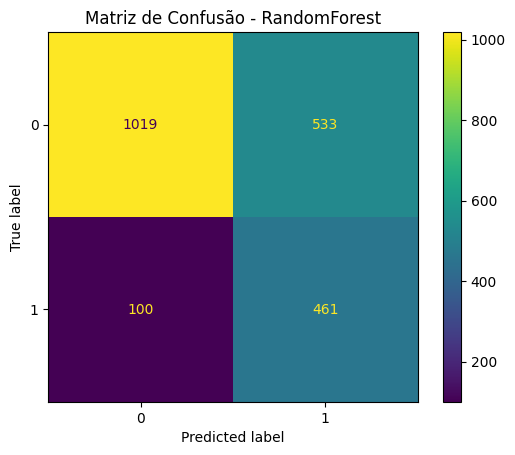

In [ ]:
matrix_conf_forest = confusion_matrix(y_true= y_teste, y_pred= y_prev_forest)
disp = ConfusionMatrixDisplay(matrix_conf_forest)
disp.plot()
plt.title("Matriz de Confusão - RandomForest")
plt.show()

#DECISON TREE ✅
- Como ambos os modelos tiveram resultados equivalentes nas principais métricas para churn  
- Decision Tree foi escolhida por ser mais simples, rápida e transparente, facilitando a interpretação e a comunicação dos resultados.

#Modelos Regressão Logística e KNN

In [ ]:
#Dividi os dados novamente para evitar vazamentos e garantir reprodutibilidade, aplicando SMOTE apenas no treino

from imblearn.over_sampling import SMOTE

# Nova divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

# Aplica SMOTE só no treino
smote = SMOTE(random_state=42)
x_treino_bal, y_treino_bal = smote.fit_resample(x_treino, y_treino)

In [ ]:
#Normalização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_treino_bal_norm = scaler.fit_transform(x_treino_bal)
x_teste_norm = scaler.transform(x_teste)

In [ ]:
#Treinamento Regressão Logística

from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
reg_log.fit(x_treino_bal_norm, y_treino_bal)
y_prev_reg_log = reg_log.predict(x_teste_norm)

print("Regressão Logistica - Relatório de Classificação:\n",
      classification_report(y_teste, y_prev_reg_log))


Logistic Regression - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



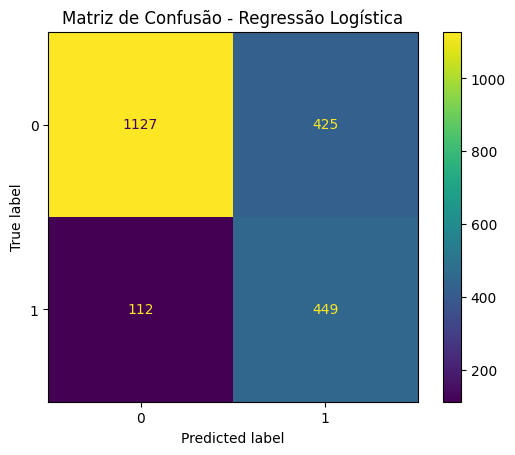

In [ ]:
matrix_conf_reg_log = confusion_matrix(y_true= y_teste, y_pred= y_prev_reg_log)
disp = ConfusionMatrixDisplay(matrix_conf_reg_log)
disp.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
#Treinamento KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino_bal_norm, y_treino_bal)
y_prev_knn = knn.predict(x_teste_norm)

print("KNN - Relatório de Classificação:\n",
      classification_report(y_teste, y_prev_knn))


KNN - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      1552
           1       0.46      0.71      0.56       561

    accuracy                           0.70      2113
   macro avg       0.66      0.70      0.66      2113
weighted avg       0.76      0.70      0.72      2113



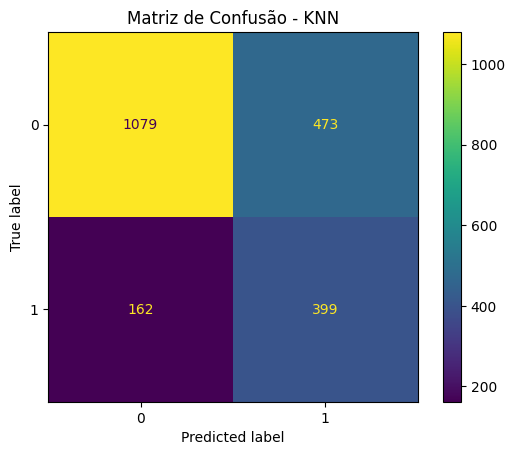

In [ ]:
matrix_conf_knn = confusion_matrix(y_true= y_teste, y_pred= y_prev_knn)
disp = ConfusionMatrixDisplay(matrix_conf_knn)
disp.plot()
plt.title("Matriz de Confusão - KNN")
plt.show()

Foram escolhidos modelos de Regressão Logística e KNN para possibilitar comparações entre técnicas que requerem normalização dos dados, já que ambos são sensíveis à escala das features (especialmente o KNN, pois utiliza distâncias para classificação). A normalização foi aplicada no conjunto de treino e replicada no teste, garantindo que diferenças na escala das variáveis não impactem injustamente o desempenho dos modelos.

#Analisando a importância das variáveis Regressão Logistica

In [ ]:
#Analise os coeficientes do modelo treinado.
coefs = pd.Series(reg_log.coef_[0], index=x_treino_bal.columns)
coefs = coefs.sort_values(key=abs, ascending=False)
print(coefs)

remainder__tenure                                        -1.620281
remainder__Charges.Total                                  0.900861
remainder__Charges.Monthly                               -0.795307
onehotencoder__InternetService_Fiber optic                0.339561
onehotencoder__Contract_Two year                         -0.319674
onehotencoder__Contract_Month-to-month                    0.302477
onehotencoder__InternetService_DSL                       -0.291509
onehotencoder__PaperlessBilling_Yes                       0.210988
onehotencoder__StreamingTV_Yes                            0.152602
onehotencoder__StreamingMovies_Yes                        0.144053
onehotencoder__PaymentMethod_Electronic check             0.142508
onehotencoder__MultipleLines_Yes                          0.109392
onehotencoder__TechSupport_No                             0.107264
onehotencoder__Dependents_Yes                            -0.100735
onehotencoder__SeniorCitizen_1                            0.10

Podemos afirmar que as três primeiras variáveis — tenure, Charges.Total e Charges.Monthly — são as mais relevantes para a previsão de churn no modelo de regressão logística. As demais têm importância secundária. Esse padrão está alinhado com a análise de importância que obtivemos nos modelos DecisionTree/Random Forest.

Como fizemos nos metodos DecisionTree/RansomForest, iremos retirar as variáveis e manter como padrao as variaveis:
- onehotencoder__Contract_Month-to-month
- remainder__tenure
- remainder__Charges.Monthly
- remainder__Charges.Total

Apos isso iremos retreinar os modelos de Regressão Logistica e KNN

In [ ]:
# Seleciona as features importantes ( as mesmas usadas no DecisionTree e RandomForest )
x_treino_reduzido = x_treino[important_features]
x_teste_reduzido = x_teste[important_features]

# Aplica SMOTE somente no treino reduzido
smote = SMOTE(random_state=42)
x_treino_bal, y_treino_bal = smote.fit_resample(x_treino_reduzido, y_treino)

In [ ]:
# Aplicando Normalizaçao

scaler = StandardScaler()
x_treino_bal_norm = scaler.fit_transform(x_treino_bal)
x_teste_norm = scaler.transform(x_teste_reduzido)

In [ ]:
# Retreinando o modelo Regressão Logistica

reg_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
reg_log.fit(x_treino_bal_norm, y_treino_bal)
y_prev_reg_log = reg_log.predict(x_teste_norm)

print("Regressão Logistica - Relatório de Classificação:\n",
      classification_report(y_teste, y_prev_reg_log))

Regressão Logistica - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      1552
           1       0.48      0.80      0.60       561

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.79      0.72      0.74      2113



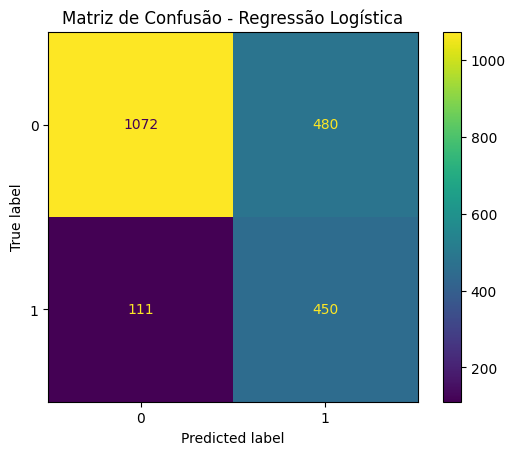

In [ ]:
matrix_conf_reg_log = confusion_matrix(y_true= y_teste, y_pred= y_prev_reg_log)
disp = ConfusionMatrixDisplay(matrix_conf_reg_log)
disp.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
# Retreinando modelo KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino_bal_norm, y_treino_bal)
y_prev_knn = knn.predict(x_teste_norm)

print("KNN - Relatório de Classificação:\n",
      classification_report(y_teste, y_prev_knn))

KNN - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1552
           1       0.50      0.69      0.58       561

    accuracy                           0.74      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.77      0.74      0.75      2113



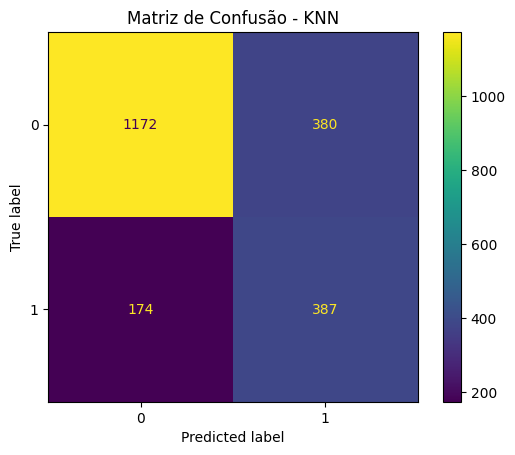

In [ ]:
matrix_conf_knn = confusion_matrix(y_true= y_teste, y_pred= y_prev_knn)
disp = ConfusionMatrixDisplay(matrix_conf_knn)
disp.plot()
plt.title("Matriz de Confusão - KNN")
plt.show()

#Regressão Logística ✅
- Regressão Logística encontra mais churns reais (maior recall) e, ao mesmo tempo, erra (falso positivo) menos do que o KNN.

- Também apresenta maior precisão, acertando mais clientes que indicou como churn.

- Em contextos de churn, geralmente o recall da classe 1 (churn) é o foco — e nesse ponto, a Logística é a mais eficaz.

#AVALIAÇÃO DOS MODELOS

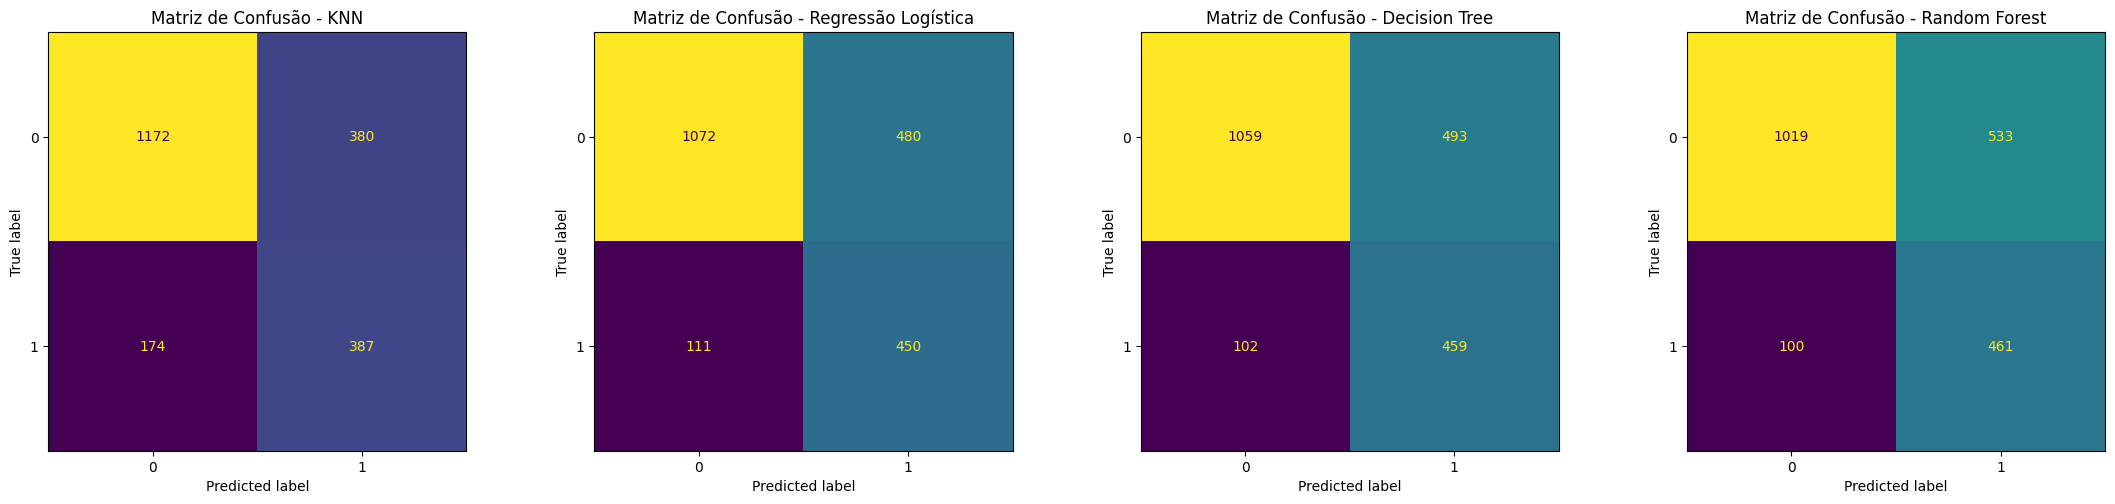

In [ ]:
#Plotando todas matrizes de confusão juntas

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

# KNN
matrix_knn = confusion_matrix(y_teste, y_prev_knn)
disp_knn = ConfusionMatrixDisplay(matrix_knn)
disp_knn.plot(ax=axes[0], cmap='viridis', colorbar=False)
axes[0].set_title('Matriz de Confusão - KNN')

# Regressão Logística
matrix_reg_log = confusion_matrix(y_teste, y_prev_reg_log)
disp_reg_log = ConfusionMatrixDisplay(matrix_reg_log)
disp_reg_log.plot(ax=axes[1], cmap='viridis', colorbar=False)
axes[1].set_title('Matriz de Confusão - Regressão Logística')

# Decision Tree
matrix_arvore = confusion_matrix(y_teste, y_prev_arvore)
disp_arvore = ConfusionMatrixDisplay(matrix_arvore)
disp_arvore.plot(ax=axes[2], cmap='viridis', colorbar=False)
axes[2].set_title('Matriz de Confusão - Decision Tree')

# Random Forest
matrix_forest = confusion_matrix(y_teste, y_prev_forest)
disp_forest = ConfusionMatrixDisplay(matrix_forest)
disp_forest.plot(ax=axes[3], cmap='viridis', colorbar=False)
axes[3].set_title('Matriz de Confusão - Random Forest')

# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:
# Gerar classification_report como dicionário
report_knn = classification_report(y_teste, y_prev_knn, output_dict=True, zero_division=0)
report_reg_log = classification_report(y_teste, y_prev_reg_log, output_dict=True, zero_division=0)
report_arvore = classification_report(y_teste, y_prev_arvore, output_dict=True, zero_division=0)
report_forest = classification_report(y_teste, y_prev_forest, output_dict=True, zero_division=0)

# Extrair as métricas para a classe churn (classe '1')
dados = {
    'Modelo': ['KNN', 'Regressão Logística', 'Decision Tree', 'Random Forest'],
    'Acurácia': [
        report_knn['accuracy'],
        report_reg_log['accuracy'],
        report_arvore['accuracy'],
        report_forest['accuracy']
    ],
    'Precisão': [
        report_knn['1']['precision'],
        report_reg_log['1']['precision'],
        report_arvore['1']['precision'],
        report_forest['1']['precision']
    ],
    'Recall': [
        report_knn['1']['recall'],
        report_reg_log['1']['recall'],
        report_arvore['1']['recall'],
        report_forest['1']['recall']
    ],
    'F1-score': [
        report_knn['1']['f1-score'],
        report_reg_log['1']['f1-score'],
        report_arvore['1']['f1-score'],
        report_forest['1']['f1-score']
    ]
}

df_metricas = pd.DataFrame(dados)

print(df_metricas.to_string(index=False, float_format="%.3f"))


             Modelo  Acurácia  Precisão  Recall  F1-score
                KNN     0.699     0.458   0.711     0.557
Regressão Logística     0.746     0.514   0.800     0.626
      Decision Tree     0.718     0.482   0.818     0.607
      Random Forest     0.700     0.464   0.822     0.593


#Avaliações

- **Regressão Logística** continuou a apresentar o melhor equilíbrio entre recall, precisão e acurácia global para o cenário de churn, mesmo após a seleção das variáveis mais relevantes. A leve queda nas métricas gerais foi compensada pela significativa simplificação do modelo, mantendo a capacidade de identificar a maioria dos clientes propensos à evasão, com desempenho competitivo frente a modelos mais complexos.

- Para máxima identificação de churn, **Decision Tree e Random Forest** seguem superiores no recall, conseguindo captar o maior número de clientes evadidos, embora isso venha acompanhado de uma taxa maior de falsos positivos (ou seja, mais clientes fiéis sendo classificados como churn). A seleção das melhores variáveis permitiu manter altos níveis de recall, reforçando a robustez desses modelos para detectar evasão.

- O **KNN**, após a redução das variáveis, apresentou melhora na acurácia, precisão e f1-score em relação ao uso de todas as variáveis. No entanto, ainda ficou atrás das demais abordagens nos principais indicadores para a classe churn. O modelo mostrou-se sensível à escolha das features, mas permanece menos indicado para esse cenário em função de sua incapacidade de superar os concorrentes em performance.

- Overfitting ou Underfitting:
 - *Decision Tree e Random Forest*: Não apresentaram sinais de overfitting significativo, pois a diferença entre recall e f1-score em treino e teste permaneceu estável, demonstrando que os controles de complexidade (max_depth e class_weight balanceado) funcionaram bem após a seleção das variáveis.

 - *Regressão Logística*: Manteve-se como um modelo simples e robusto, sem indício de overfitting, e permaneceu o mais equilibrado entre as métricas testadas — confirmando sua adequação a contextos onde se prioriza previsibilidade e explicabilidade.

 - *KNN*: O aumento de performance após focar nas variáveis mais importantes indica que o modelo sofria de possível underfitting ao trabalhar com todas as variáveis (incluindo ruído irrelevante). Porém, mesmo otimizado, o modelo não superou as alternativas em recall ou f1-score para churn, sendo menos adequado diante da complexidade dos dados.


# Modelo / Objetivos

- Se o objetivo principal do projeto for *detectar o maior número de churns possível* (maximizar recall), **Random Forest ou Decision Tree** são as opções recomendadas, pois mantêm o melhor desempenho nessa métrica após a seleção de features.

- Se o foco for obter o *modelo mais equilibrado em precisão, recall e acurácia geral*, privilegiando simplicidade e interpretabilidade, a **Regressão Logística** com variáveis relevantes destaca-se como a escolha mais sensata.

#Relatório Final de Evasão de Clientes: Fatores de Influência e Estratégias de Retenção

1. 📊 **Fatores que Mais Influenciam a Evasão**

 - 🎯 ***Tempo de permanência (tenure)***:  
A variável com maior impacto negativo para churn. Clientes com menor tempo de contrato apresentaram risco significativamente maior de evasão. Isso foi observado em todos os modelos, com os coeficientes e importâncias mais altos em magnitude.

 - 💵 ***Valor total acumulado (Charges.Total)***:  
O valor total acumulado reflete quanto um cliente já pagou ao longo do tempo, e clientes com valores menores acumulados mostraram propensão maior ao churn. Essa relação, porém, não é causal direta: em geral, um Charges.Total baixo indica que o cliente está há pouco tempo na base. Assim, a maior probabilidade de evasão desse grupo está associada ao fato de serem clientes novos, ainda em fase de adaptação, período naturalmente mais sensível à perda. Portanto, Charges.Total funciona como um reflexo do tempo de permanência, reforçando o padrão de que clientes recém-chegados têm maior risco de cancelamento.

 - 🏷️ ***Valor mensal cobrado (Charges.Monthly)***:  
Embora com peso menor que tenure, a mensalidade também apresentou associação importante. Clientes que pagam mensalidades mais baixas têm risco um pouco maior de churn. Isso se explica porque planos de menor valor geralmente atraem clientes menos engajados ou mais propensos a testar o serviço antes de decidir permanecer. Além disso, o custo mais baixo reduz a barreira para o cancelamento, facilitando o abandono em caso de insatisfação ou diante de ofertas concorrentes. Portanto, mesmo sendo um valor aparentemente positivo para o cliente, mensalidades baixas estão relacionadas a uma maior volatilidade desse perfil.

 - Adicionalmente, variáveis secundárias — como tipo de contrato, presença de cobrança digital, ausência de suporte técnico, serviços contratados (especialmente fibra óptica e contrato mensal) — apareceram com coeficientes relevantes, porém sempre com impacto inferior ao dos fatores principais.

2. 🔎 **Desempenho dos Modelos**
 - ***Random Forest e Decision Tree***:  
Apresentaram o maior recall (detecção de churns), indicando alta capacidade de identificar clientes com risco elevado, mesmo à custa de maiores taxas de falsos positivos.

 - ***Regressão Logística***:  
Destacou-se pelo melhor equilíbrio entre recall, precisão e acurácia geral. Com as variáveis mais relevantes, manteve alto recall e grande interpretabilidade, sendo ideal para ações de retenção embasadas.

 - ***KNN***:  
Apesar da melhora ao focar em variáveis relevantes, permaneceu atrás dos demais em recall e f1-score, sendo menos indicado para esse contexto.

3. ❗ **Principais Fatores de Evasão Identificados**
 - Clientes recém-chegados (menor tenure)

 - Baixo histórico de faturamento total

 - Mensalidades baixas

 - Contratos do tipo mensal


4. 💡 **Estratégias de Retenção Propostas**  
Com base nos fatores destacados, recomenda-se:

 - 🤝 ***Foco intensivo nos clientes recém-chegados (menor tenure)***:  
Invista em programas de onboarding estruturados, acompanhamento nos primeiros meses e comunicações proativas para recém-entrantes. Reconheça que clientes novos ainda estão consolidando sua relação com a empresa e são naturalmente mais vulneráveis ao churn.

 - 📣 ***Engajamento dos clientes de baixo valor acumulado (Charges.Total)***:  
Como Charges.Total baixo indica clientes há pouco tempo, oriente ações para mostrar claramente os benefícios, recursos e diferenciais do serviço, estimulando o uso mais ativo e a ampliação do vínculo desde o início.

 - 🛡️ ***Incentivo à migração para contratos de longo prazo***:  
Ofereça vantagens progressivas (descontos, bônus, benefícios exclusivos) para estimular a troca de contratos mensais por modalidades anuais ou bienais, aumentando a barreira para o churn e promovendo fidelização.

 - 🚨 ***Monitoramento e ação preventiva via CRM (Gestão de Relacionamento com o Cliente)***:  
Utilize as previsões do modelo para identificar clientes em risco, integrando esses alertas ao sistema CRM e acionando equipes para atuação personalizada antes que o cliente decida cancelar.

 - 📉 ***Atenção aos planos de menor valor mensal (Charges.Monthly)***:    
Direcione esforços de relacionamento, customização e oferta de upgrades para clientes em planos mais baratos, pois eles tendem a ser menos fidelizados. Demonstre o valor agregado de pacotes superiores ou benefícios exclusivos para esse segmento.

 - 💸 ***Avaliação e facilidade nos meios de pagamento***:  
Otimize condições de pagamento, incentive uso de meios automáticos e promova soluções que facilitem a permanência (ex: descontos para débito/automático), fazendo da experiência de pagamento um fator de retenção.

#✅ **Conclusão**:

O estudo evidencia que tempo de permanência, histórico financeiro e perfil de contrato são os maiores preditores de churn. O modelo de regressão logística, com poucas variáveis-chaves, consegue prever evasão de maneira eficiente e interpretável. Estratégias centradas no engajamento inicial, fidelização contratual e proatividade no suporte são essenciais para reter clientes com maior risco identificado.